# Импорт

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [178]:
data = pd.read_csv(
    '../Data/DataLaba1/energy_task_moded_removed_nan.csv').drop('year', axis=1)
a = -1
b = 1
power = 2
# data = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
sl = data.shape[0]
scale = StandardScaler().fit_transform(data)
# y_data = StandardScaler().fit_transform(data['Appliances'][0:sl])
X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(power).fit_transform(data.drop('Appliances', axis=1)), scale.T[-1], test_size=0.25)


In [179]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*1.5),
                                activation='elu',
                                input_shape=(X_train.shape[1],),
                                name='input',
                              #   kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                # bias_initializer=tf.keras.initializers.GlorotNormal,
                                use_bias=True
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]//2),
                                activation='sigmoid',
                                name='hidden_layer_2',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
# model.add(tf.keras.layers.Dense(int(X_train.shape[1]*0.5),
#                                 activation='elu',
#                                 name='hidden_layer_3',
#                                 #   bias_constraint=tf.keras.constraints.max_norm(1000.),
#                                 # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
#                                 use_bias=True,
#                                 # bias_initializer=tf.keras.initializers.GlorotNormal
#                                 ))
model.add(tf.keras.layers.Dense(1,
                                name='output',
                                activation='sigmoid',
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.HeNormal
                                ))
model.compile(loss='mse',optimizer='Adam', metrics=['mse'])


## Компиляция

In [180]:
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse', 'mae'],
    jit_compile=True
)


# Обучение

In [181]:
model.fit(
    X_train,
    y_train,
    validation_split=0.6,
    epochs=50,
    batch_size=15,
    # workers=4,
    use_multiprocessing=True,
)


Epoch 1/50
371/371 [==============================] - 4s 8ms/step - loss: 0.9077 - mse: 0.9077 - mae: 0.8125 - val_loss: 0.8841 - val_mse: 0.8841 - val_mae: 0.7939
Epoch 2/50
371/371 [==============================] - 2s 6ms/step - loss: 0.8860 - mse: 0.8860 - mae: 0.8061 - val_loss: 0.8601 - val_mse: 0.8601 - val_mae: 0.8020
Epoch 3/50
371/371 [==============================] - 2s 5ms/step - loss: 0.8983 - mse: 0.8983 - mae: 0.8172 - val_loss: 0.9975 - val_mse: 0.9975 - val_mae: 0.8651
Epoch 4/50
371/371 [==============================] - 2s 5ms/step - loss: 1.0026 - mse: 1.0026 - mae: 0.8675 - val_loss: 0.9966 - val_mse: 0.9966 - val_mae: 0.8648
Epoch 5/50
371/371 [==============================] - 2s 6ms/step - loss: 0.9805 - mse: 0.9805 - mae: 0.8546 - val_loss: 0.9312 - val_mse: 0.9312 - val_mae: 0.8286
Epoch 6/50
371/371 [==============================] - 2s 5ms/step - loss: 0.9060 - mse: 0.9060 - mae: 0.8138 - val_loss: 0.8704 - val_mse: 0.8704 - val_mae: 0.7950
Epoch 7/50
371/3

# Predict

In [182]:
y_predicted = model.predict(X_test).T[0]


145/145 [==============================] - 0s 2ms/step


In [183]:
y_predicted


array([0.00446678, 0.00446678, 0.00446678, ..., 0.73722816, 0.73722816,
       0.00446678], dtype=float32)

In [184]:
y_predicted.mean(), y_predicted.std()


(0.42169338, 0.3628185)

In [185]:
model.weights

[<tf.Variable 'input/kernel:0' shape=(435, 652) dtype=float32, numpy=
 array([[ 0.10024287,  0.02449753, -0.04018938, ...,  0.06106881,
         -0.05203926, -0.04440527],
        [ 0.03189167,  0.02998919, -0.02623761, ..., -0.0102792 ,
         -0.06062129,  0.00427441],
        [-0.02531438,  0.00129293, -0.07218158, ..., -0.0461943 ,
          0.00791319,  0.0059712 ],
        ...,
        [ 0.0810389 , -0.05116747, -0.01898217, ...,  0.04570545,
         -0.03120454, -0.01970163],
        [ 0.02347757, -0.03738275, -0.06044763, ..., -0.06558096,
          0.03674616, -0.00324416],
        [ 0.05919456,  0.00984064, -0.03353683, ..., -0.01224608,
          0.04386117, -0.06510546]], dtype=float32)>,
 <tf.Variable 'input/bias:0' shape=(652,) dtype=float32, numpy=
 array([ 4.41478454e-02, -2.61064097e-02, -8.44254531e-03, -1.02406954e-02,
        -4.17189533e-03,  3.63313518e-02, -6.61778683e-03,  1.53058851e-02,
         2.69477325e-03,  2.42362870e-03, -1.14743160e-02, -9.63509548e

# Оценка качества 

In [186]:
y_all = model.predict(PolynomialFeatures(power).fit_transform(
    data.drop('Appliances', axis=1)[0:sl])).T[0]


580/580 [==============================] - 1s 2ms/step


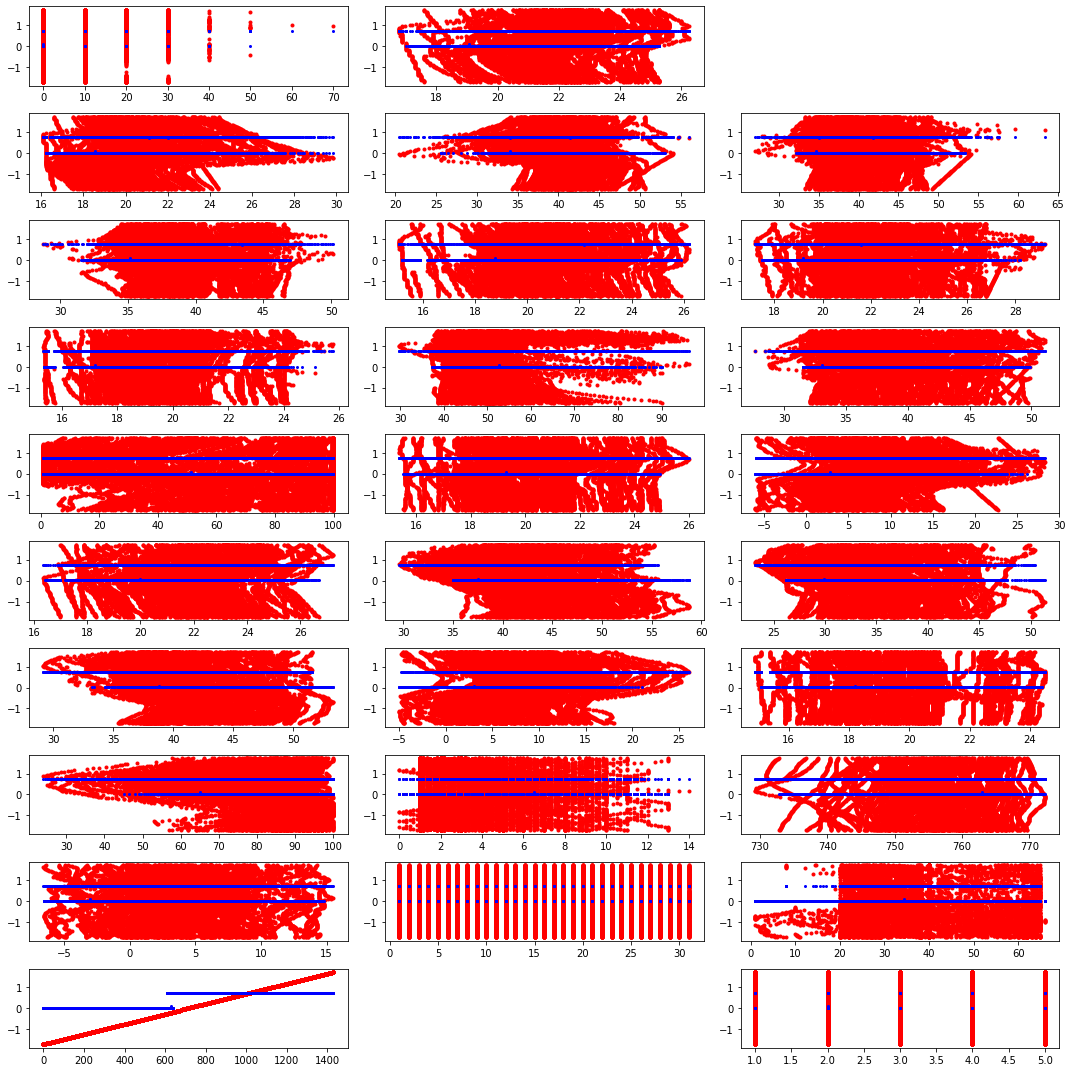

In [187]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = data.drop('Appliances', axis=1).columns
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z=0
k=0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(data[i], scale.T[-1], 'ro', markersize=3)
  ax.plot(data[i], y_all, 'bo', markersize=2)
  k+=1
  z+=(k % 3) // 2
  

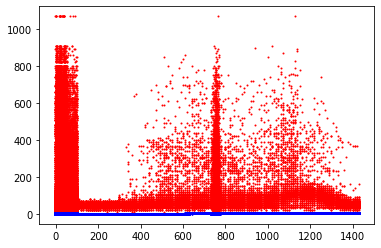

In [188]:
plt.plot(data.drop('Appliances', axis=1)[0:sl],
         data['Appliances'][0:sl], 'ro', markersize=1)
plt.plot(data.drop('Appliances', axis=1)[0:sl], y_all*6.1, 'bo', markersize=1)


In [189]:
print(f"MAE: {mean_absolute_error(y_predicted*2.7, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted*2.7, y_test)}',
      f'MSE: {mean_squared_error(y_predicted*2.7, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted*2.7, y_test)}',
      f'R^2: {r2_score(y_predicted*2.7, y_test)}',
      sep='\n')

MAE: 1.126203094834018
RMSE: 1.5466798715200014
MSE: 1.2436558493088035
MAPE: 35.612296540988694
R^2: -0.6117364275074131
